# ¡Hola, Tania!  

Mi nombre es Francisco Benavides, soy code reviewer de Tripleten y voy a revisar el proyecto que acabas de desarrollar.


Cada ves que vea un error por primera vez, lo señalaré. Deberás encontrarlo y arreglarlo, ya que buscamos que te prepares para un trabajo real, en el cual tu líder de equipo hará lo mismo. Si no puedes solucionar el error, te brindaré algunos tips más especificos la proxima vez.

Podrás encontrar mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer cuidadosamente cada una de tus implementaciones que has llevado a cabo para complir con tu informe. Cada uno de mis comentarios tiene el siguiente código de colores:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Si encuentras que es necesario, puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

Mucho éxito!

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.


<b>Objetivos:</b> 

El propósito del siguiente proyecto es el análisis de las diferentes tarifas de la telefonía. Observar el comportamiento de los usuarios y ver la rentabilidad de cada uno de los planes.

A través de la metodología aplicada se compararán los diferentes servicios que se ofrecen, como llamadas, megas y minutos, para poder decidir que clases de acciones se deben tomar para la mejora de los servicios. 

<b>Acciones a tomar:</b> 

Al revisar a grandes rasgos las indicaciones de cada parte del proyecto se necesitará decidir las librerias a utilizar, revisar los tipos de datos a trabajar y convertirlos a los necesarios, combinar tablas para obtener la información necesaria, utilización de filtrados, uso de graficas de barras, histogramas y de caja para la comparacion de muestras y al finalizar la utilizacion de la formula estadistica para comparacion de dos muestras diferentes y decidir entre que hipótesis se trabajará.



## Inicialización

In [49]:
# Cargar todas las librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st


## Cargar datos

In [50]:
# Carga los archivos de datos en diferentes DataFrames 
df_calls = pd.read_csv(r'C:\Users\tnoir\Documents\Data scientist\SPRINT 4\Project\csv_Files\megaline_calls.csv') 
df_internet = pd.read_csv(r'C:\Users\tnoir\Documents\Data scientist\SPRINT 4\Project\csv_Files\megaline_internet.csv') 
df_messages = pd.read_csv(r'C:\Users\tnoir\Documents\Data scientist\SPRINT 4\Project\csv_Files\megaline_messages.csv')  
df_plans = pd.read_csv(r'C:\Users\tnoir\Documents\Data scientist\SPRINT 4\Project\csv_Files\megaline_plans.csv')  
df_users = pd.read_csv(r'C:\Users\tnoir\Documents\Data scientist\SPRINT 4\Project\csv_Files\megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [51]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [52]:
# Imprime una muestra de los datos para las tarifas

display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Son dos filas con ocho columnas, de las cuales los tipos de datos parecen apropiados. Los usd por mensaje y minuto vienen como flotantes porque hay decimales y los usd por mes y por gb son int64. Aunque por el momento sean numeros enteros, tratándose de dinero creo conveniente cambiar los datos de usd por mes y por gb a float64.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [53]:
df_plans[['usd_monthly_pay', 'usd_per_gb']] = df_plans[['usd_monthly_pay', 'usd_per_gb']].astype(float)
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 260.0+ bytes


## Enriquecer los datos

No hay algo mas que se le pueda agregar. 

In [54]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [55]:
# Imprime una muestra de datos para usuarios
display(df_users.head())

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Existen 500 registros de los cuales solo la columna de churn date viene incompleta, ya que el servicio sigue activo para esos usuarios y la columna de fecha viene como object. Creo conveniente hacer estos dos cambios en el dataframe. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [56]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')
df_users['activity_month'] = df_users['reg_date'].dt.month
df_users['churn_date'] = df_users['churn_date'].fillna('None')
df_users.info()
display(df_users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         500 non-null    int64         
 1   first_name      500 non-null    object        
 2   last_name       500 non-null    object        
 3   age             500 non-null    int64         
 4   city            500 non-null    object        
 5   reg_date        500 non-null    datetime64[ns]
 6   plan            500 non-null    object        
 7   churn_date      500 non-null    object        
 8   activity_month  500 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(5)
memory usage: 33.3+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,activity_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,None,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,None,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,None,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,None,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,None,5


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [57]:
print(df_users.isnull().sum()) #verificación de nulos por si acaso

user_id           0
first_name        0
last_name         0
age               0
city              0
reg_date          0
plan              0
churn_date        0
activity_month    0
dtype: int64


## Llamadas

In [58]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [59]:
# Imprime una muestra de datos para las llamadas
display(df_calls.head())


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


El problema persiste en la columna de call_date ya que viene como object y se tendra que cambiar a datetime con la funcion to_datetime. no hay NaN y todo lo demas parece estar en orden. Creo que seria adecuado agregar una columna con el tipo de plan que le corresponde al usuario para futuros cálculos y debido a que los planes redondean al minuto próximo los segundos de las llamadas, se añadirá otra columna para estos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [60]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [61]:
df_calls['activity_month'] = df_calls['call_date'].dt.month
df_calls['rnd_duration'] = np.ceil(df_calls['duration']) # Redondeo de la columna de la llamada hacia arriba

display(df_calls.head())
df_calls.info()

,id,user_id,call_date,duration,activity_month,rnd_duration
0,1000_93,1000,2018-12-27,8.52,12,9.0
1,1000_145,1000,2018-12-27,13.66,12,14.0
2,1000_247,1000,2018-12-27,14.48,12,15.0
3,1000_309,1000,2018-12-28,5.76,12,6.0
4,1000_380,1000,2018-12-30,4.22,12,5.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              137735 non-null  object        
 1   user_id         137735 non-null  int64         
 2   call_date       137735 non-null  datetime64[ns]
 3   duration        137735 non-null  float64       
 4   activity_month  137735 non-null  int32         
 5   rnd_duration    137735 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(1)
memory usage: 5.8+ MB


In [62]:
print(df_calls.isnull().sum()) #verificación de nulos por si acaso

id                0
user_id           0
call_date         0
duration          0
activity_month    0
rnd_duration      0
dtype: int64


## Mensajes

In [63]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [64]:
# Imprime una muestra de datos para los mensajes
display(df_messages.head())
print(df_messages.isnull().sum()) #verificación de nulos por si acaso

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


id              0
user_id         0
message_date    0
dtype: int64


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Volvemos a lo mismo con el tipo de dato para el tiempo. Éste se cambiara a datetime y se añadira otra columna para identificar al plan al que pertenece.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [65]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [66]:
df_messages['activity_month'] = df_messages['message_date'].dt.month

display(df_messages.head())
df_messages.info()

,id,user_id,message_date,activity_month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              76051 non-null  object        
 1   user_id         76051 non-null  int64         
 2   message_date    76051 non-null  datetime64[ns]
 3   activity_month  76051 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 2.0+ MB


## Internet

In [67]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [68]:
# Imprime una muestra de datos para el tráfico de internet
display(df_internet.head())
print(df_internet.isnull().sum()) #verificación de nulos por si acaso

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Convertir a datetime la columna de session_date y añadir columna de plan para cada usuario. De ahí en delante no veo algún otro error. También ya que al momento de hacer el conteo mensual de gigas, éste se redondeará. Será necesario añadir otra columna de los megas convertidos a gb.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [69]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [70]:
df_internet['gb_used'] = df_internet['mb_used']/1024
df_internet['activity_month'] = df_internet['session_date'].dt.month
df_internet = df_internet.merge(df_users[['user_id','plan']], on = 'user_id' , how = 'left') # combinación de dataframes para messages.

display(df_internet.head())
df_internet.info()

,id,user_id,session_date,mb_used,gb_used,activity_month,plan
0,1000_13,1000,2018-12-29,89.86,0.087754,12,ultimate
1,1000_204,1000,2018-12-31,0.00,0.000000,12,ultimate
2,1000_379,1000,2018-12-28,660.40,0.644922,12,ultimate
3,1000_413,1000,2018-12-26,270.99,0.264639,12,ultimate
4,1000_442,1000,2018-12-27,880.22,0.859590,12,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              104825 non-null  object        
 1   user_id         104825 non-null  int64         
 2   session_date    104825 non-null  datetime64[ns]
 3   mb_used         104825 non-null  float64       
 4   gb_used         104825 non-null  float64       
 5   activity_month  104825 non-null  int32         
 6   plan            104825 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(2)
memory usage: 5.2+ MB


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [71]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
display(df_plans)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [72]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_monthly_calls = df_calls.groupby(['user_id','activity_month'])['call_date'].count().reset_index()
df_monthly_calls = df_monthly_calls.rename(columns = {'call_date' : 'calls_count'})
df_monthly_calls = df_monthly_calls.sort_values(by='activity_month', ascending=True).reset_index(drop = True)
display(df_monthly_calls.head())

,user_id,activity_month,calls_count
0,1362,1,42
1,1042,1,18
2,1214,1,5
3,1077,1,42
4,1196,1,42


In [73]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
df_monthly_calltime = df_calls.groupby(['user_id','activity_month'])['rnd_duration'].sum().reset_index()
df_monthly_calltime = df_monthly_calltime.sort_values(by = 'activity_month').reset_index(drop=True)
display(df_monthly_calltime.head())

,user_id,activity_month,rnd_duration
0,1362,1,292.0
1,1042,1,114.0
2,1214,1,16.0
3,1077,1,290.0
4,1196,1,287.0


In [74]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
df_monthly_msg = df_messages.groupby(['user_id','activity_month'])['message_date'].count().reset_index()
df_monthly_msg = df_monthly_msg.rename(columns = {'message_date' : 'message_count'})
df_monthly_msg = df_monthly_msg.sort_values(by='activity_month', ascending=True).reset_index(drop = True)
display(df_monthly_msg.head())

,user_id,activity_month,message_count
0,1196,1,23
1,1077,1,37
2,1214,1,2
3,1362,1,21
4,1138,2,7


In [75]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
df_monthly_internet = df_internet.groupby(['user_id','activity_month'])['gb_used'].sum().reset_index()
df_monthly_internet = df_monthly_internet.sort_values(by = 'activity_month').reset_index(drop = True)
display(df_monthly_internet.head())

#Debido a que las condiciones del plan dictan que los megas usados por mes se redondearán a los gigas próximos, se modificará la columna gb_used
df_monthly_internet['gb_used'] = np.ceil(df_monthly_internet['gb_used'])
display(df_monthly_internet.head())

,user_id,activity_month,gb_used
0,1196,1,8.699814
1,1042,1,1.811455
2,1362,1,7.709756
3,1185,1,6.653096
4,1077,1,10.386367


,user_id,activity_month,gb_used
0,1196,1,9.0
1,1042,1,2.0
2,1362,1,8.0
3,1185,1,7.0
4,1077,1,11.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
excelente trabajo agrupando los dataframes!
</div>

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [76]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

#como son varios dataframes y no hacerlo tan confuso, se usará la funcion reduce

from functools import reduce

users_dataframes = [df_monthly_calls , df_monthly_calltime , df_monthly_msg , df_monthly_internet]

users_info = reduce(lambda left, right: pd.merge(left, right, on = ['user_id', 'activity_month'] , how = 'outer'),users_dataframes)

display (users_info.head())


,user_id,activity_month,calls_count,rnd_duration,message_count,gb_used
0,1362,1,42.0,292.0,21.0,8.0
1,1042,1,18.0,114.0,NaN,2.0
2,1214,1,5.0,16.0,2.0,2.0
3,1077,1,42.0,290.0,37.0,11.0
4,1196,1,42.0,287.0,23.0,9.0


In [77]:
# Añade la información de la tarifa
df_users_plan = users_info.merge(df_users[['user_id','plan']], on = 'user_id' , how = 'left')
df_users_plan = df_users_plan.merge(df_plans , left_on = 'plan' , right_on = 'plan_name' , how = 'left')
df_users_plan = df_users_plan.drop (columns = ['plan_name'])
df_users_plan = df_users_plan.fillna(0)

#cambiaré el valor de megas a gigas
df_users_plan['mb_per_month_included'] = df_users_plan['mb_per_month_included'] / 1024
df_users_plan = df_users_plan.rename(columns = {'mb_per_month_included' : 'gb_per_month_included'})

display(df_users_plan)


,user_id,activity_month,calls_count,rnd_duration,message_count,gb_used,plan,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1362,1,42.0,292.0,21.0,8.0,surf,50,15.0,500,20.0,10.0,0.03,0.03
1,1042,1,18.0,114.0,0.0,2.0,surf,50,15.0,500,20.0,10.0,0.03,0.03
2,1214,1,5.0,16.0,2.0,2.0,ultimate,1000,30.0,3000,70.0,7.0,0.01,0.01
3,1077,1,42.0,290.0,37.0,11.0,ultimate,1000,30.0,3000,70.0,7.0,0.01,0.01
4,1196,1,42.0,287.0,23.0,9.0,ultimate,1000,30.0,3000,70.0,7.0,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1080,12,0.0,0.0,61.0,24.0,surf,50,15.0,500,20.0,10.0,0.03,0.03
2289,1349,12,0.0,0.0,61.0,13.0,surf,50,15.0,500,20.0,10.0,0.03,0.03
2290,1204,12,0.0,0.0,78.0,36.0,ultimate,1000,30.0,3000,70.0,7.0,0.01,0.01
2291,1311,6,0.0,0.0,0.0,2.0,ultimate,1000,30.0,3000,70.0,7.0,0.01,0.01


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [78]:
# Calcula el ingreso mensual para cada usuario

#primero crearé un nuevo dataframe con las columnas de user_id y Activity_month de la tabla anterior
df_monthly_payment = df_users_plan[['user_id' , 'activity_month', 'plan']].copy()

# En el nuevo df añadiré columnas con los costos extras si hubo y al final el total en usd.

df_monthly_payment['calls_extra_cost'] = ((df_users_plan['rnd_duration'] - df_users_plan['minutes_included']).clip(lower = 0)) * df_users_plan['usd_per_minute'] 
df_monthly_payment['msg_extra_cost'] = ((df_users_plan['message_count'] - df_users_plan['messages_included']).clip(lower = 0)) * df_users_plan['usd_per_message']
df_monthly_payment['gb_extra_cost'] = ((df_users_plan['gb_used'] - df_users_plan['gb_per_month_included']).clip(lower = 0)) * df_users_plan['usd_per_gb']
df_monthly_payment['plan_cost'] = df_monthly_payment['calls_extra_cost'] + df_monthly_payment['msg_extra_cost'] + df_monthly_payment['gb_extra_cost'] + df_users_plan['usd_monthly_pay']
display(df_monthly_payment)

,user_id,activity_month,plan,calls_extra_cost,msg_extra_cost,gb_extra_cost,plan_cost
0,1362,1,surf,0.0,0.00,0.0,20.00
1,1042,1,surf,0.0,0.00,0.0,20.00
2,1214,1,ultimate,0.0,0.00,0.0,70.00
3,1077,1,ultimate,0.0,0.00,0.0,70.00
4,1196,1,ultimate,0.0,0.00,0.0,70.00
...,...,...,...,...,...,...,...
2288,1080,12,surf,0.0,0.33,90.0,110.33
2289,1349,12,surf,0.0,0.33,0.0,20.33
2290,1204,12,ultimate,0.0,0.00,42.0,112.00
2291,1311,6,ultimate,0.0,0.00,0.0,70.00


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
tienes razon, no lo habia notado
</div>

<div class="alert alert-block alert-info">
Hola!
La columna 'plan_cost' es lo que pagaría al final del mes cada usuario ya con todo sumado. Éstas primeras 5 lineas aparecen sus planes originales porque no hubo extras. Deja quito el head() para que muestre las últimas que si alcanzan a reflejar diferencias.
</div>

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

    activity_month      plan  rnd_duration
0                1      surf    203.000000
1                1  ultimate    193.500000
2                2      surf    297.000000
3                2  ultimate    403.142857
4                3      surf    330.000000
5                3  ultimate    304.250000
6                4      surf    351.540000
7                4  ultimate    336.857143
8                5      surf    399.584416
9                5  ultimate    406.241379
10               6      surf    431.298969
11               6  ultimate    370.957447
12               7      surf    449.983471
13               7  ultimate    427.067797
14               8      surf    410.111111
15               8  ultimate    421.436620
16               9      surf    414.226804
17               9  ultimate    437.511628
18              10      surf    429.729958
19              10  ultimate    450.735849
20              11      surf    423.325088
21              11  ultimate    445.196850
22         

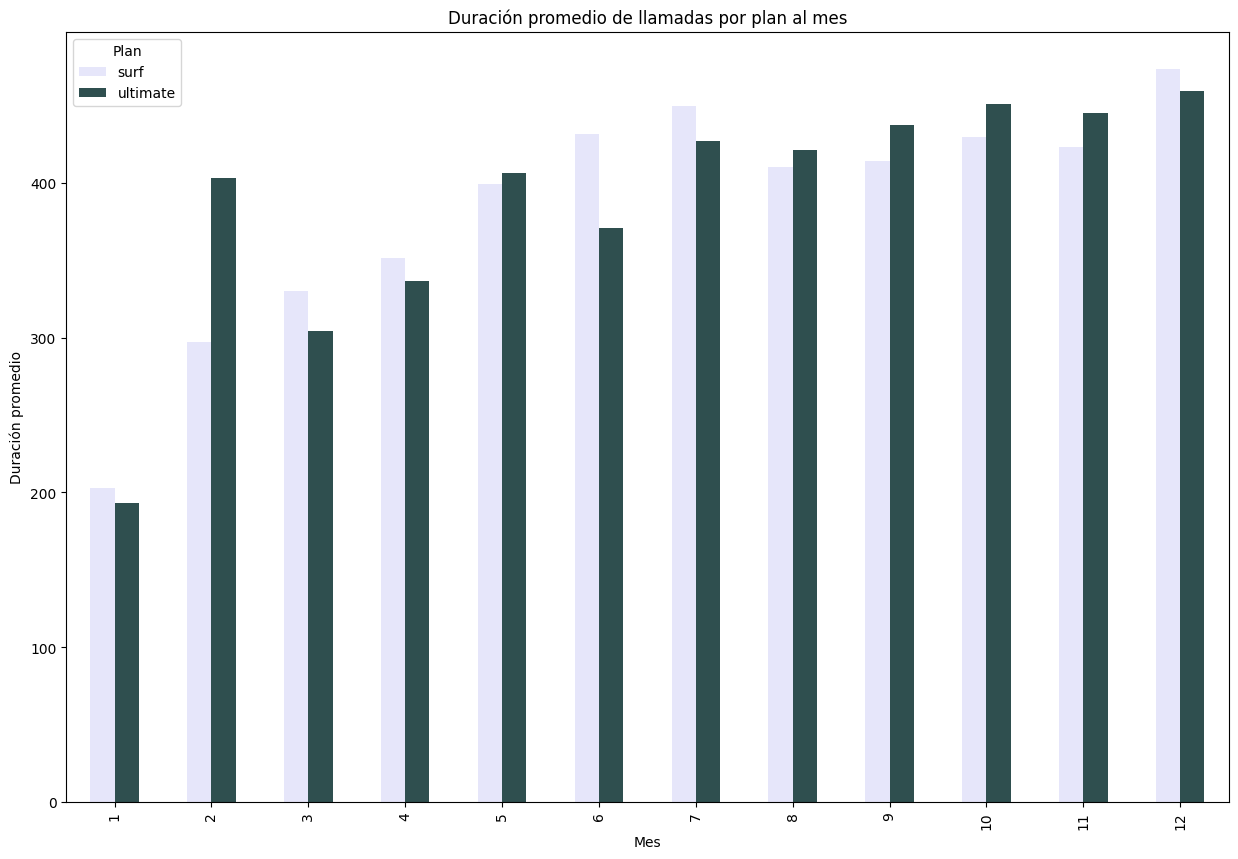

In [79]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
df_calls_mean = df_users_plan.groupby(['activity_month','plan'])['rnd_duration'].mean().reset_index()
print(df_calls_mean)
#ya que 'plan' tiene dos opciones como valores: ya sea surf o ultimate. El siguiente código hará que convierta cada una en columna y la grafique
df_calls_mean.pivot(index='activity_month', columns='plan', values='rnd_duration').plot(kind='bar', figsize=(15, 10), color = ['lavender' , 'darkslategray'])
plt.title('Duración promedio de llamadas por plan al mes')
plt.xlabel('Mes')
plt.ylabel('Duración promedio')
plt.legend(title='Plan')
plt.show()

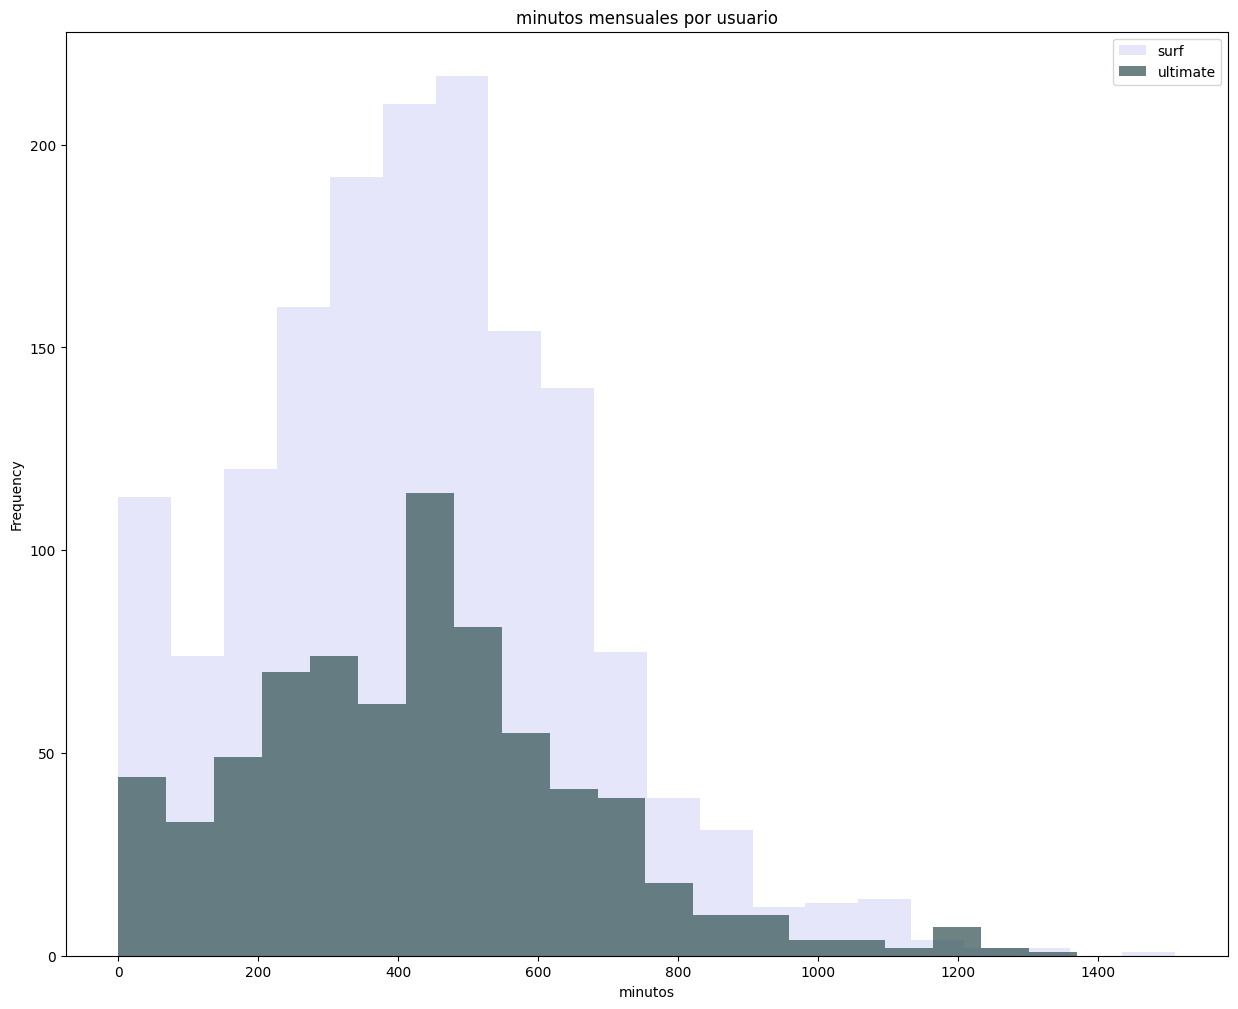

In [80]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

df_users_plan[df_users_plan['plan'] == 'surf']['rnd_duration'].plot(kind = 'hist', bins = 20, color = 'lavender' )
df_users_plan[df_users_plan['plan'] == 'ultimate']['rnd_duration'].plot(title = 'minutos mensuales por usuario',xlabel = 'minutos',kind = 'hist', bins = 20, alpha = 0.7 ,color = 'darkslategray',figsize=(15,12))
plt.legend(['surf' , 'ultimate'])
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [81]:
# Calcula la media y la varianza de la duración mensual de llamadas.

df_calls_mean_var = df_users_plan.groupby(['activity_month','plan'])['rnd_duration'].agg(['mean' , 'var']).reset_index()
display(df_calls_mean_var)

,activity_month,plan,mean,var
0,1,surf,203.000000,15842.000000
1,1,ultimate,193.500000,16572.333333
2,2,surf,297.000000,52226.500000
3,2,ultimate,403.142857,76889.476190
4,3,surf,330.000000,35809.363636
5,3,ultimate,304.250000,61984.931818
6,4,surf,351.540000,50866.743265
7,4,ultimate,336.857143,34888.928571
8,5,surf,399.584416,59754.219754
9,5,ultimate,406.241379,43841.046798


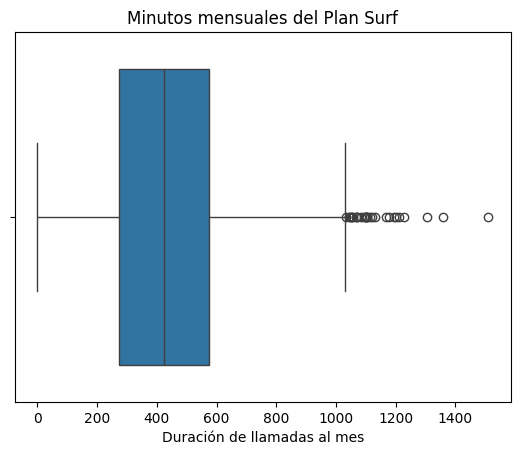

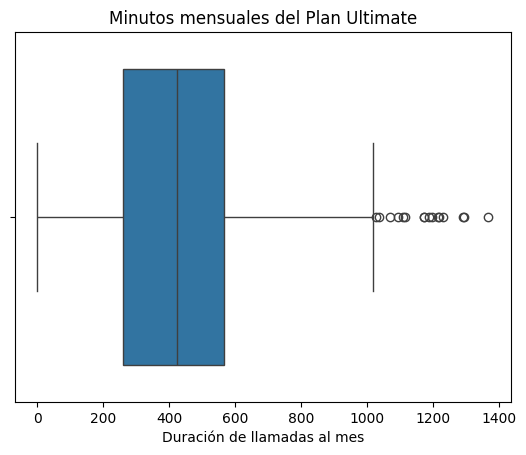

In [82]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
surf_dist = df_users_plan[df_users_plan['plan'] == 'surf']['rnd_duration'].reset_index(drop = True)
sns.boxplot(x=surf_dist)
plt.xlabel('Duración de llamadas al mes')
plt.title('Minutos mensuales del Plan Surf')
plt.show()

ultimate_dist = df_users_plan[df_users_plan['plan'] == 'ultimate']['rnd_duration'].reset_index(drop = True)
sns.boxplot(x=ultimate_dist)
plt.xlabel('Duración de llamadas al mes')
plt.title('Minutos mensuales del Plan Ultimate')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

A simple vista podemos concluir que las dos medias son muy cercanas, las medianas igual ya que las podemos apreciar en los diagramas de caja. Lo que nos muestran los gráficos es que no hay mucha diferencia entre los dos planes en cuanto a llamadas se trata. 
Como dato curioso, partiendo del histógrama realizado, podemos apreciar como hay mas usuarios del plan surf que al mes duran mas tiempo llamando que los del plan ultimate.

### Mensajes

,activity_month,plan,message_mean
0,1,surf,10.500000
1,1,ultimate,15.500000
2,2,surf,12.000000
3,2,ultimate,21.571429
4,3,surf,15.260870
5,3,ultimate,20.250000
6,4,surf,17.400000
7,4,ultimate,22.047619
8,5,surf,24.012987
9,5,ultimate,32.103448


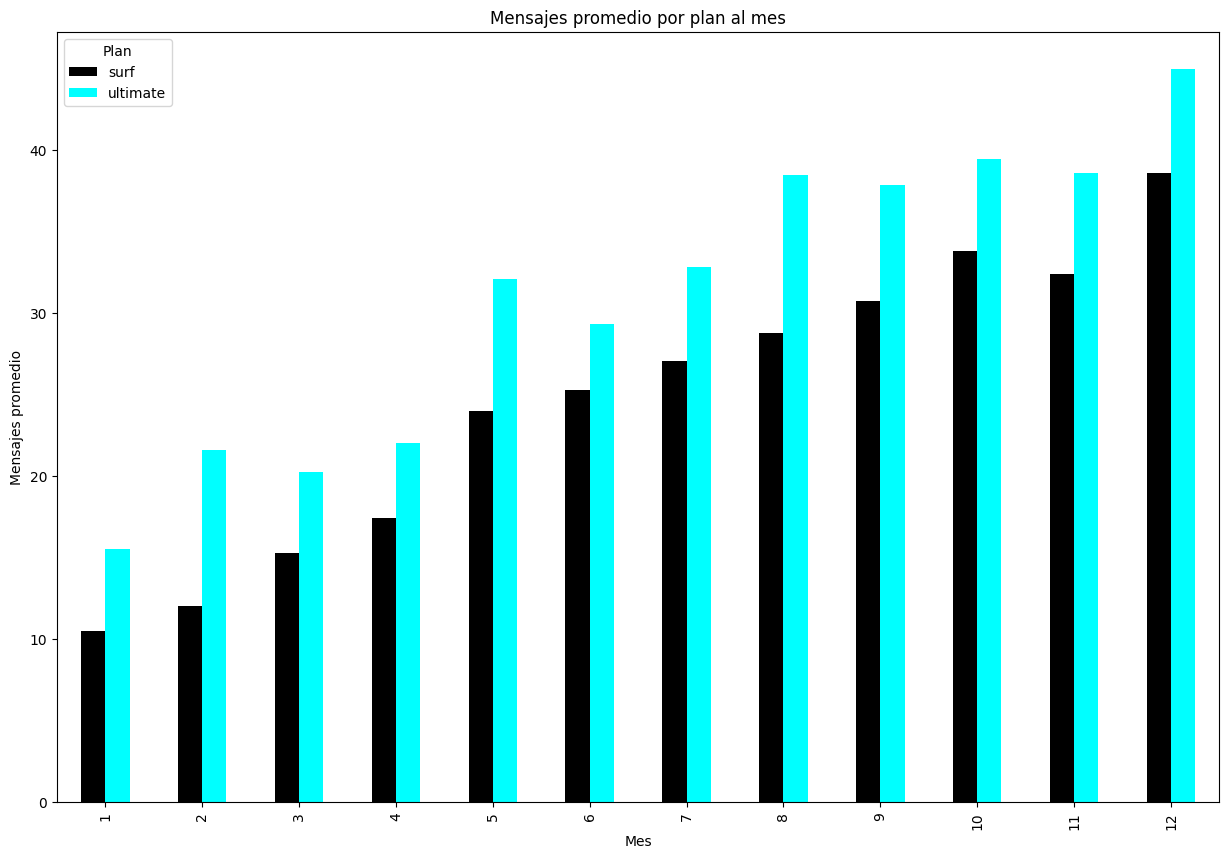

In [83]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Compara la duración promedio de mensajes por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
df_msn_mean = df_users_plan.groupby(['activity_month','plan'])['message_count'].mean().reset_index()
df_msn_mean = df_msn_mean.rename(columns = {'message_count' : 'message_mean'})
display(df_msn_mean)

#ya que 'plan' tiene dos opciones como valores: ya sea surf o ultimate. El siguiente código hará que convierta cada una en columna y la grafique
df_msn_mean.pivot(index='activity_month', columns='plan', values='message_mean').plot(kind='bar', figsize=(15, 10), color = ['black','cyan'])
plt.title('Mensajes promedio por plan al mes')
plt.xlabel('Mes')
plt.ylabel('Mensajes promedio')
plt.legend(title='Plan')
plt.show()


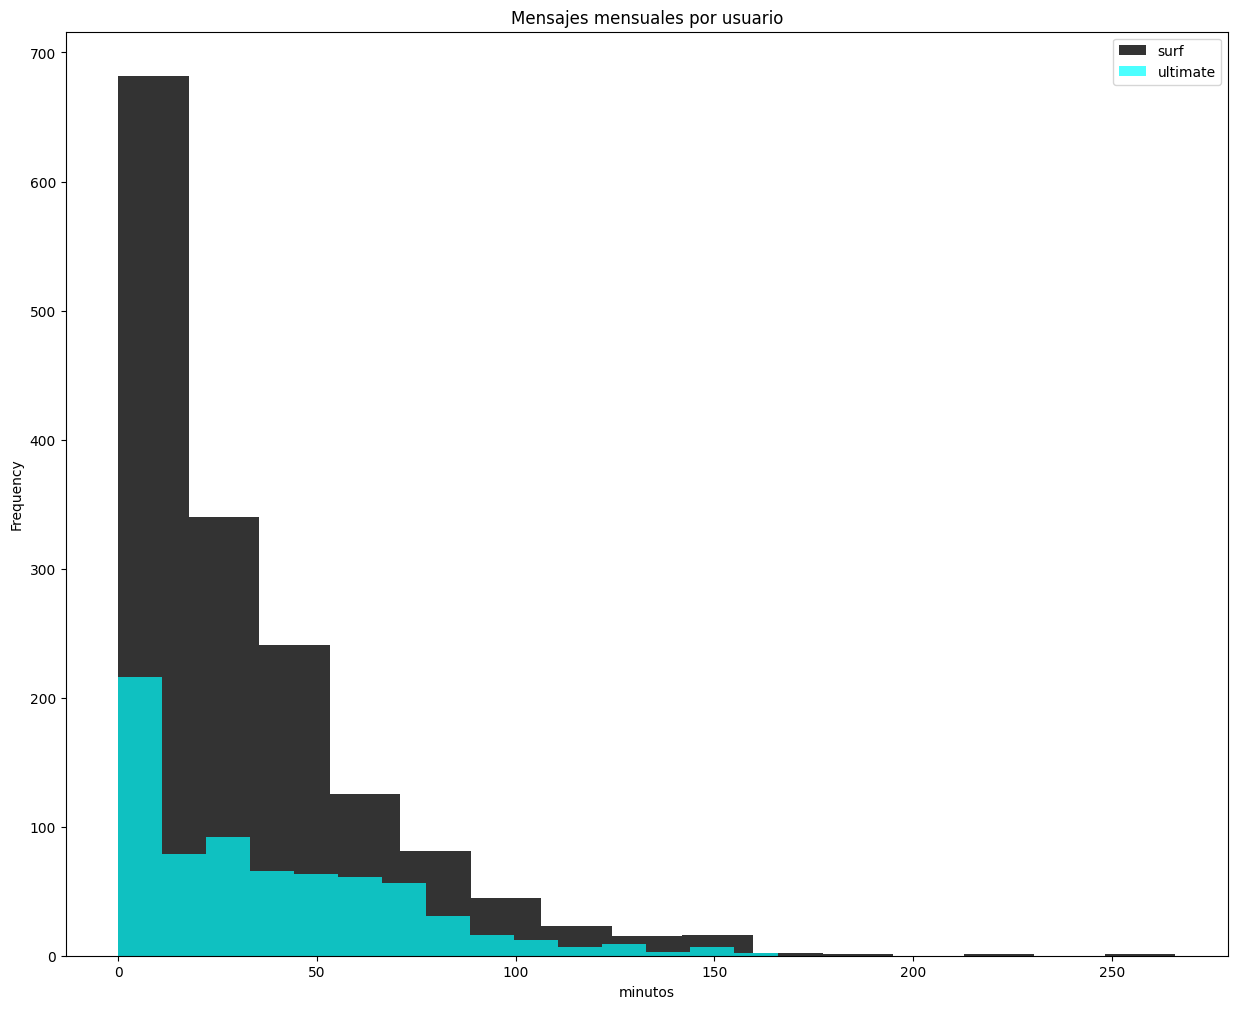

In [84]:
#actividad por usuario de mensajes mensuales
df_users_plan[df_users_plan['plan'] == 'surf']['message_count'].plot(kind = 'hist', bins = 15, color = 'black', alpha = 0.8 )
df_users_plan[df_users_plan['plan'] == 'ultimate']['message_count'].plot(title = 'Mensajes mensuales por usuario',xlabel = 'minutos',kind = 'hist', bins = 15, alpha = 0.7 ,color = 'cyan',figsize=(15,12))
plt.legend(['surf' , 'ultimate'])
plt.show()


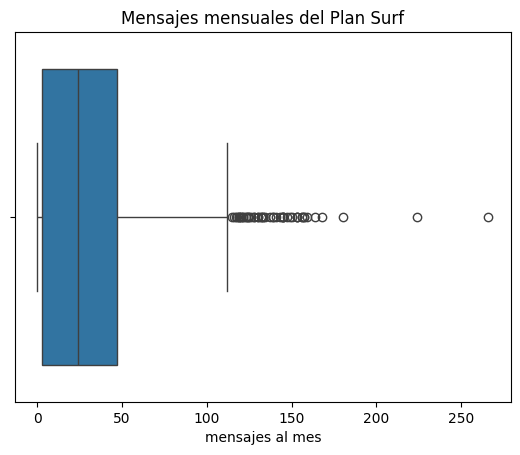

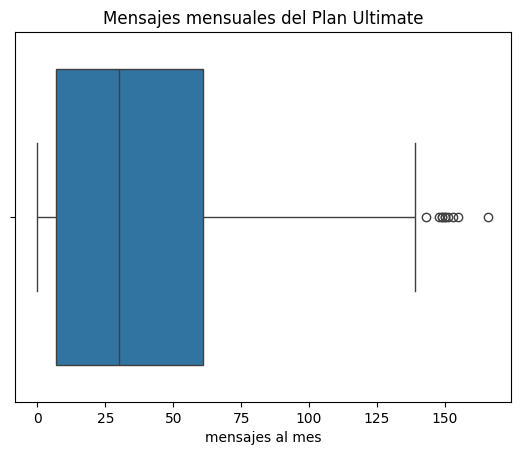

In [85]:
# diagramas de caja para ver distribución de la media.
surf_dist_msn = df_users_plan[df_users_plan['plan'] == 'surf']['message_count'].reset_index(drop = True)
sns.boxplot(x=surf_dist_msn)
plt.xlabel('mensajes al mes')
plt.title('Mensajes mensuales del Plan Surf')
plt.show()

ultimate_dist_msn = df_users_plan[df_users_plan['plan'] == 'ultimate']['message_count'].reset_index(drop = True)
sns.boxplot(x=ultimate_dist_msn)
plt.xlabel('mensajes al mes')
plt.title('Mensajes mensuales del Plan Ultimate')
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

De acuerdo a las graficas, la media es superior para el plan ultimate, se ve que la concentracion de mensajes por mes de los usuarios es de 0 a 50, despues a 100 y luego a su limite superior. El uso de mensajes aumenta conforme van pasando los meses. Bajo en Enero y en diciembre alcanza su máximo para ambos planes.
Aqui si hay diferencia entre un plan y otro, aun así, siendo el límite de 1000 mensajes por mes para los usuarios de ultimate, no hay quien se acerque a ese límite.

### Internet

,activity_month,plan,gb_used_mean
0,1,surf,5.000000
1,1,ultimate,7.250000
2,2,surf,12.222222
3,2,ultimate,17.285714
4,3,surf,13.565217
5,3,ultimate,18.416667
6,4,surf,12.220000
7,4,ultimate,16.333333
8,5,surf,14.116883
9,5,ultimate,16.862069


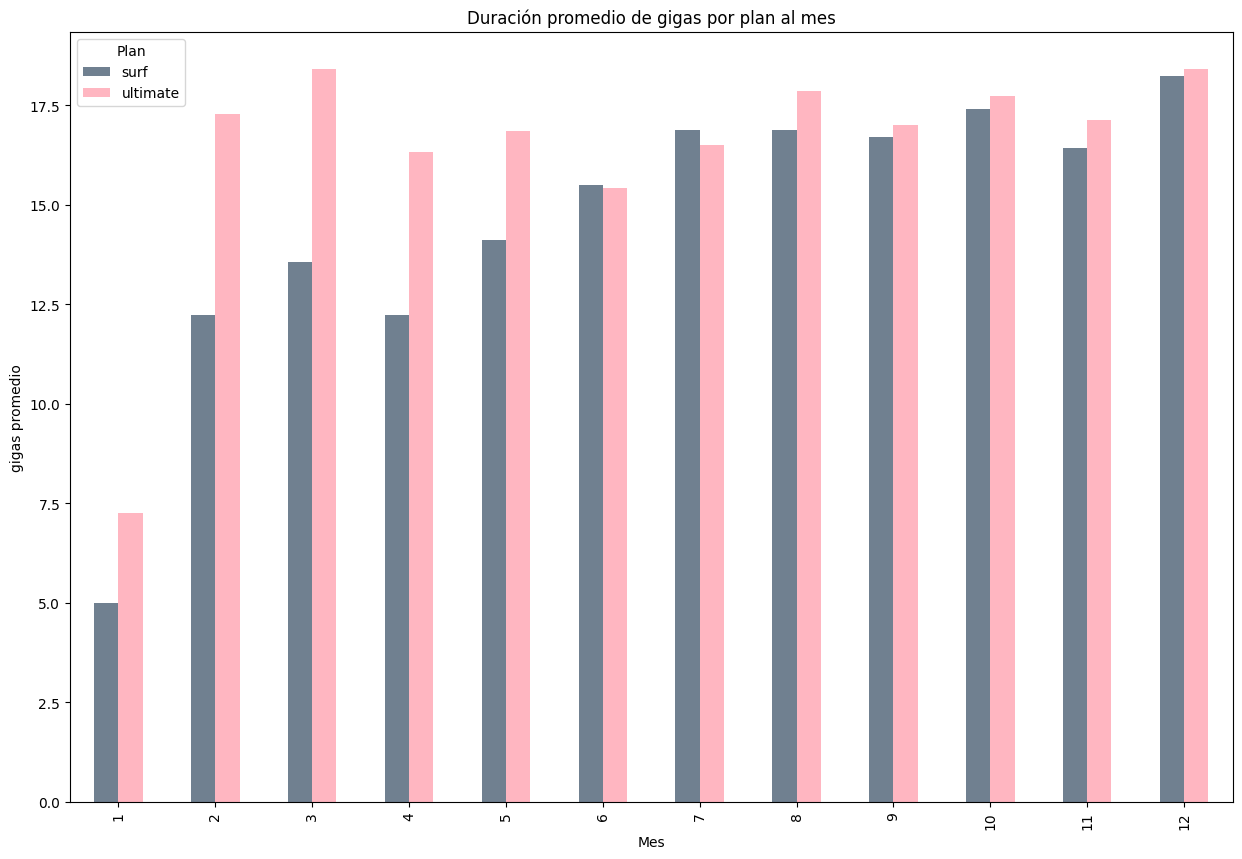

In [86]:
# El gráfico compara la duración promedio de uso de internet por cada plan y por cada mes.
df_gb_mean = df_users_plan.groupby(['activity_month','plan'])['gb_used'].mean().reset_index()
df_gb_mean = df_gb_mean.rename(columns = {'gb_used':'gb_used_mean'})
display(df_gb_mean)
#ya que 'plan' tiene dos opciones como valores: ya sea surf o ultimate. El siguiente código hará que convierta cada una en columna y la grafique
df_gb_mean.pivot(index='activity_month', columns='plan', values='gb_used_mean').plot(kind='bar', figsize=(15, 10), color = ['slategray' , 'lightpink'])
plt.title('Duración promedio de gigas por plan al mes')
plt.xlabel('Mes')
plt.ylabel('gigas promedio')
plt.legend(title='Plan')
plt.show()

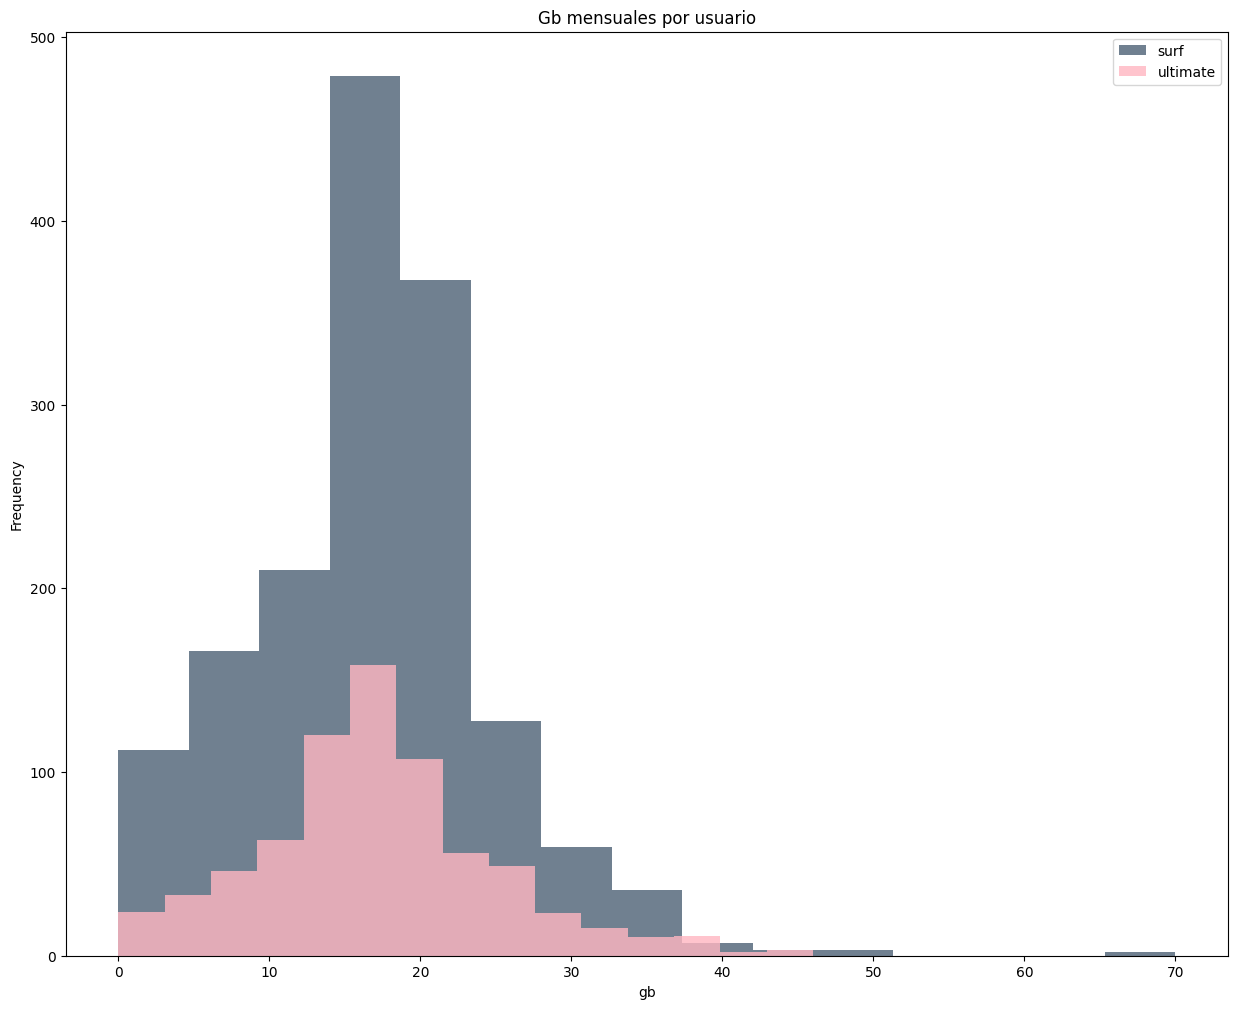

In [87]:
#actividad por usuario de uso de gb mensuales
df_users_plan[df_users_plan['plan'] == 'surf']['gb_used'].plot(kind = 'hist', bins = 15, color = 'slategray' )
df_users_plan[df_users_plan['plan'] == 'ultimate']['gb_used'].plot(title = 'Gb mensuales por usuario',xlabel = 'gb',kind = 'hist', bins = 15, alpha = 0.8 ,color = 'lightpink',figsize=(15,12))
plt.legend(['surf' , 'ultimate'])
plt.show()

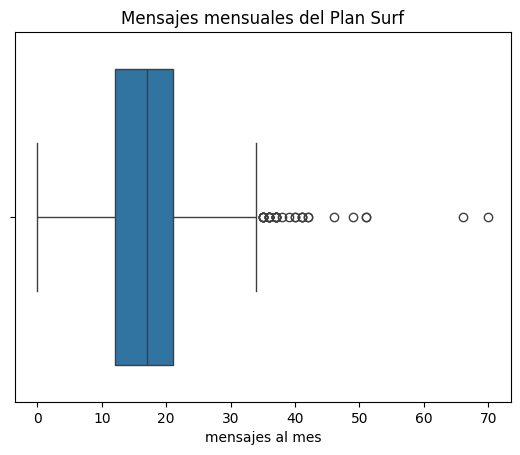

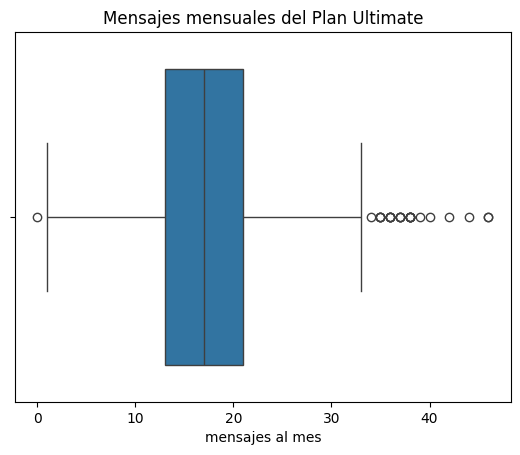

In [88]:
surf_dist_gb = df_users_plan[df_users_plan['plan'] == 'surf']['gb_used'].reset_index(drop = True)
sns.boxplot(x=surf_dist_gb)
plt.xlabel('mensajes al mes')
plt.title('Mensajes mensuales del Plan Surf')
plt.show()

ultimate_dist_gb = df_users_plan[df_users_plan['plan'] == 'ultimate']['gb_used'].reset_index(drop = True)
sns.boxplot(x=ultimate_dist_gb)
plt.xlabel('mensajes al mes')
plt.title('Mensajes mensuales del Plan Ultimate')
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

De acuerdo a las gráficas, no hay mucha diferencia en cuanto al plan ya que ambos tienen medias muy parecidas. En el gráfico de barras se ve una diferencia significativa los primeros 5 meses del año. De ahí en delante todo es muy parecido. 
En las graficas de caja se ve que la mediana es similar en ambos casos pero hay mas valores atípicos en surf, y los usuarios de ultimate son mas consistentes con el uso de sus megas.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [89]:
# Tabla que anteriormente había calculado con los ingresos mensuales por usuario.
display(df_monthly_payment.head())

,user_id,activity_month,plan,calls_extra_cost,msg_extra_cost,gb_extra_cost,plan_cost
0,1362,1,surf,0.0,0.0,0.0,20.0
1,1042,1,surf,0.0,0.0,0.0,20.0
2,1214,1,ultimate,0.0,0.0,0.0,70.0
3,1077,1,ultimate,0.0,0.0,0.0,70.0
4,1196,1,ultimate,0.0,0.0,0.0,70.0


In [90]:
df_monthly_mean = df_monthly_payment.groupby(['activity_month','plan'])['plan_cost'].mean().reset_index()
df_monthly_mean = df_monthly_mean.rename(columns = {'plan_cost':'plan_cost_mean'})
display(df_monthly_mean)

,activity_month,plan,plan_cost_mean
0,1,surf,20.000000
1,1,ultimate,70.000000
2,2,surf,34.396667
3,2,ultimate,70.000000
4,3,surf,45.941304
5,3,ultimate,74.666667
6,4,surf,40.710600
7,4,ultimate,73.000000
8,5,surf,47.628182
9,5,ultimate,70.724138


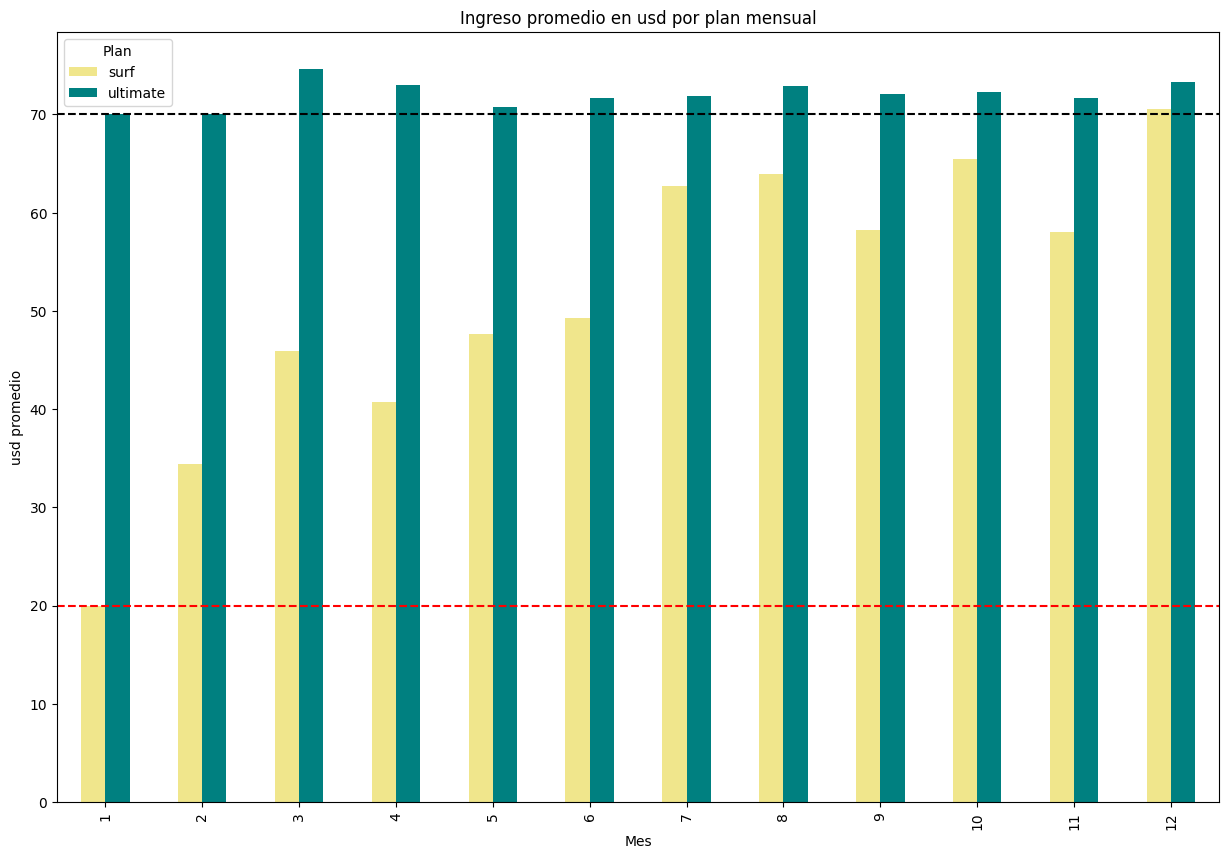

In [91]:
usd_per_plan = df_monthly_mean.pivot(index='activity_month', columns='plan', values='plan_cost_mean').plot(kind='bar', figsize=(15, 10), color = ['khaki' , 'teal'])
plt.title('Ingreso promedio en usd por plan mensual')
plt.xlabel('Mes')
plt.ylabel('usd promedio')
plt.legend(title='Plan')
usd_per_plan.axhline(y=20, color='red', linestyle='--', label ='surf' )
usd_per_plan.axhline(y=70, color='black', linestyle='--', label ='ultimate')
plt.show()

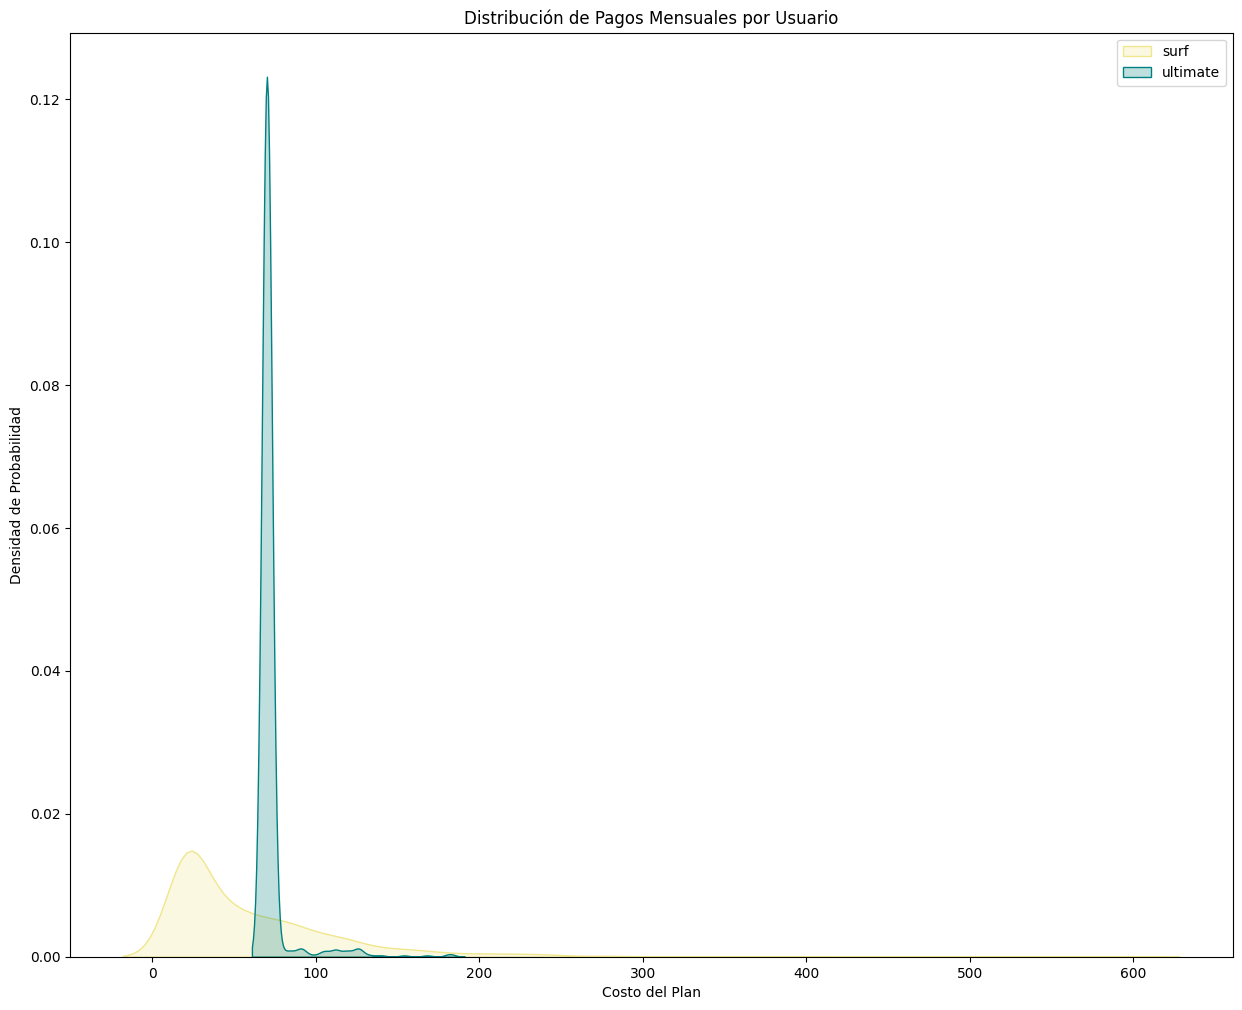

In [92]:
# Supongamos que df_monthly_payment es tu DataFrame y 'plan_cost' es la columna de interés

# Filtrar datos por plan
surf_data = df_monthly_payment[df_monthly_payment['plan'] == 'surf']['plan_cost']
ultimate_data = df_monthly_payment[df_monthly_payment['plan'] == 'ultimate']['plan_cost']

# Crear gráfico de densidad
plt.figure(figsize=(15, 12))
sns.kdeplot(surf_data, color='khaki', fill=True, label='surf')
sns.kdeplot(ultimate_data, color='teal', fill=True, label='ultimate')

# Configuración de etiquetas y título
plt.title('Distribución de Pagos Mensuales por Usuario')
plt.xlabel('Costo del Plan')
plt.ylabel('Densidad de Probabilidad')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

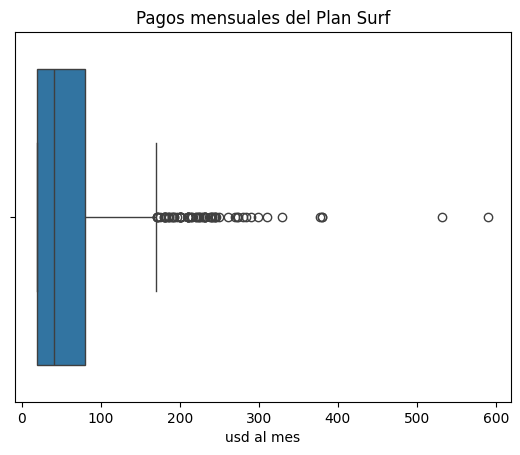

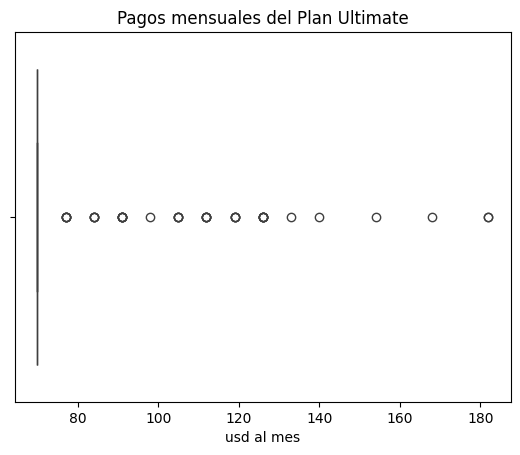

In [93]:
surf_dist_usd = df_monthly_payment[df_monthly_payment['plan'] == 'surf']['plan_cost'].reset_index(drop = True)
sns.boxplot(x=surf_dist_usd)
plt.xlabel('usd al mes')
plt.title('Pagos mensuales del Plan Surf')
plt.show()

ultimate_dist_usd = df_monthly_payment[df_monthly_payment['plan'] == 'ultimate']['plan_cost'].reset_index(drop = True)
sns.boxplot(x=ultimate_dist_usd)
plt.xlabel('usd al mes')
plt.title('Pagos mensuales del Plan Ultimate')
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

Las tablas nos muestran que el plan Ultimate es el que cubre con las necesidades de sus usuarios ya que en la gráfica de barras podemos observar que la media del precio es cercana a su precio base de 70 usd al mes. Sin embargo, la diferencia es gigantesca en cuanto al plan surf ya que el precio final es muy por encima de su precio base de 20 usd. Ese plan no da abasto a sus usuarios, lo que sería conveniente por la compañia que ofreciera un plan intermedio que cubra las necesidades de su clientela. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente analisis!
</div>

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

Hipótesis:

Para la hipótesis nula: Los ingresos promedio de ambos planes son cercanos.

Para la hipótesis alternativa: Los ingresos promedio de ambos planes son diferentes.

In [94]:
# Para la hipótesis nula, se establecerá que los ingresos promedio de ambos planes son cercanos.
# Para la hipótesis alternativa, se establecerá que los ingresos promedio de ambos planes son diferentes.

df_mean_surf_monthly = df_monthly_mean[df_monthly_mean['plan'] == 'surf'].reset_index(drop = True)
display(df_mean_surf_monthly)

df_mean_ultimate_monthly = df_monthly_mean[df_monthly_mean['plan'] == 'ultimate'].reset_index(drop = True)
display(df_mean_ultimate_monthly)

#prueba de hipótesis
alpha = 0.05 

results = st.ttest_ind(df_mean_surf_monthly['plan_cost_mean'], df_mean_ultimate_monthly['plan_cost_mean']) 
print('valor p: ', results.pvalue) 
print()

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula. Los ingresos promedios son diferentes de ambos planes")
else:
    print("No podemos rechazar la hipótesis nula") 



,activity_month,plan,plan_cost_mean
0,1,surf,20.000000
1,2,surf,34.396667
2,3,surf,45.941304
3,4,surf,40.710600
4,5,surf,47.628182
5,6,surf,49.276289
6,7,surf,62.674050
7,8,surf,63.931173
8,9,surf,58.271495
9,10,surf,65.421224


,activity_month,plan,plan_cost_mean
0,1,ultimate,70.000000
1,2,ultimate,70.000000
2,3,ultimate,74.666667
3,4,ultimate,73.000000
4,5,ultimate,70.724138
5,6,ultimate,71.638298
6,7,ultimate,71.898305
7,8,ultimate,72.859155
8,9,ultimate,72.034884
9,10,ultimate,72.311321


valor p:  7.831191447141079e-05

Rechazamos la hipótesis nula. Los ingresos promedios son diferentes de ambos planes


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [95]:
#separacion de area
df_users['area'] = df_users['city'].str.split(', ', expand=True)[1]

# Aqui se ve como esta expresada el area de NY-NJ Y VIENE COMO 'NY-NJ-PA MSA'
display(df_users['area'].unique())
print()
df_area_payment = df_monthly_payment.merge(df_users[['user_id','area']], on = 'user_id' , how= 'left')
display(df_area_payment)


array(['GA MSA', 'WA MSA', 'NV MSA', 'OK MSA', 'TX MSA', 'CA MSA',
       'MI MSA', 'FL MSA', 'OH MSA', 'IL-IN-WI MSA', 'TN MSA',
       'NY-NJ-PA MSA', 'PA MSA', 'DC-VA-MD-WV MSA', 'IN MSA', 'NE-IA MSA',
       'PA-NJ-DE-MD MSA', 'AL MSA', 'NC-SC MSA', 'CO MSA', 'NM MSA',
       'MA-NH MSA', 'AZ MSA', 'OR-WA MSA', 'OH-KY-IN MSA', 'SC MSA',
       'NY MSA', 'TN-MS-AR MSA', 'KY-IN MSA', 'RI-MA MSA', 'UT MSA',
       'HI MSA', 'CT MSA', 'LA MSA', 'VA-NC MSA', 'MD MSA', 'WI MSA',
       'VA MSA', 'MO-IL MSA', 'MN-WI MSA', 'MO-KS MSA', 'NC MSA'],
      dtype=object)

,user_id,activity_month,plan,calls_extra_cost,msg_extra_cost,gb_extra_cost,plan_cost,area
0,1362,1,surf,0.0,0.00,0.0,20.00,CO MSA
1,1042,1,surf,0.0,0.00,0.0,20.00,PA-NJ-DE-MD MSA
2,1214,1,ultimate,0.0,0.00,0.0,70.00,CA MSA
3,1077,1,ultimate,0.0,0.00,0.0,70.00,NC-SC MSA
4,1196,1,ultimate,0.0,0.00,0.0,70.00,CA MSA
...,...,...,...,...,...,...,...,...
2288,1080,12,surf,0.0,0.33,90.0,110.33,NY-NJ-PA MSA
2289,1349,12,surf,0.0,0.33,0.0,20.33,MA-NH MSA
2290,1204,12,ultimate,0.0,0.00,42.0,112.00,IL-IN-WI MSA
2291,1311,6,ultimate,0.0,0.00,0.0,70.00,TN-MS-AR MSA


In [96]:
# df con los valores del área NY-NJ-PA MSA
df_regions_NY = df_area_payment.query('area == "NY-NJ-PA MSA"')[['activity_month', 'plan_cost']].reset_index(drop=True)
display(df_regions_NY)

# df con los valores de las demás áreas
df_regions = df_area_payment.query('area != "NY-NJ-PA MSA"')[['activity_month', 'plan_cost']].reset_index(drop=True)
display(df_regions)

# Hipótesis nula: El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones
# Hipótesis alternativa: El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones

alpha = 0.05

result = st.ttest_ind(df_regions_NY['plan_cost'],df_regions['plan_cost'])
print('valor p: ', result.pvalue)

if result.pvalue < alpha: 
    print("El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones")
else:
    print("El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones")



,activity_month,plan_cost
0,2,20.00
1,2,70.00
2,3,70.00
3,3,20.00
4,3,20.00
...,...,...
372,9,120.42
373,10,70.00
374,10,170.27
375,11,200.00


,activity_month,plan_cost
0,1,20.00
1,1,20.00
2,1,70.00
3,1,70.00
4,1,70.00
...,...,...
1911,12,40.00
1912,12,20.33
1913,12,112.00
1914,6,70.00


valor p:  0.043557431621342436
El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones


## Conclusión general

El plan abarca llamadas, mensajes e internet. 

para las llamadas los límites son de 500 y 3000 para los planes surf y ultimate, respectivamente. La gráfica de barras nos muestra que ninguna media de ambos planes se acerca a 500. Aún así el histograma presenta sesgo hacia la derecha para usuarios de ambos planes, indicando que hay usuarios del plan surf que sobrepasan su limite de 500 mientras que los ultimate se quedan dentro de su límite.

para los mensajes los límites son de 50 y 1000 para los planes surf y ultimate, respectivamente. La gráfica de barras nos muestra que ninguna media de ambos planes se acerca a 50, siendo éste el valor mínimo para el plan surf. El histograma presenta un sesgo hacia la derecha muy parecido para ambos planes sin llegar a los 500 pero pasando los 50 del plan surf. 

para los mensajes los límites son de 15 y 30 para los planes surf y ultimate, respectivamente. La gráfica de barras nos muestra que en promedio ambos planes rondan los limites del plan surf que es 15, pasandose ligeramente en la segunda mitad del año. Los usuarios del plan ultimate su promedio no se acerca a los 30 gb. El histograma nos presenta una distribucion normal donde la media se centra en los 15 gb, sin embargo, casi la mitad de usuarios de surf se pasa de los 15 gb, haciendo que su costo aumente considerablemente ya que es el consumo el mas caro al pasarse de los limites. 

Al analisar los costos mensuales de ambos usuarios, los del plan ultimate se mantienen pagando cerca de lo correspondiente a su plan mensual, pero los usuarios de surf, terminan pagando en promedio la mitad del año, muchísimo mas de su cuota básica, acercandose a un ultimate. 

Sería recomendable en base a la información obtenida, que hubise un plan intermedio donde se ofrecieran mas llamadas, mensajes y gb deinternet. 
También si bajaran en el limite de llamadas para el ultimate y aumentaran los gigas ofrecidos en su plan, sería mucho mas atractivo para aquellos usuarios surf que sobrepasan el limite de gb y terminan pagando mas que un ultimate. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelentes conclusiones, gran trabajo en general!
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> 
    
Muchas gracias por los comentarios. Aquellos en rojo ya quedaron resueltos.
Quedo al pendiente para cualquier corrección. Saludos!!
